In [0]:
import pandas as pd
imdb = pd.read_csv('https://github.com/IvanAziz/QuarentenaDados/blob/master/Dados/movie_metadata.csv?raw=true')

In [0]:
# Os primeiros registros, default 5
imdb.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [0]:
# Os últimos registros, default 5
imdb.tail()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,Eric Mabius,Signed Sealed Delivered,629,2283,Crystal Lowe,2.0,fraud|postal worker|prison|theft|trial,http://www.imdb.com/title/tt3000844/?ref_=fn_t...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,Natalie Zea,The Following,73839,1753,Sam Underwood,1.0,cult|fbi|hideout|prison escape|serial killer,http://www.imdb.com/title/tt2071645/?ref_=fn_t...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,Eva Boehnke,A Plague So Pleasant,38,0,David Chandler,0.0,NaN,http://www.imdb.com/title/tt2107644/?ref_=fn_t...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,Alan Ruck,Shanghai Calling,1255,2386,Eliza Coupe,5.0,NaN,http://www.imdb.com/title/tt2070597/?ref_=fn_t...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660
5042,Color,Jon Gunn,43.0,90.0,16.0,16.0,Brian Herzlinger,86.0,85222.0,Documentary,John August,My Date with Drew,4285,163,Jon Gunn,0.0,actress name in title|crush|date|four word tit...,http://www.imdb.com/title/tt0378407/?ref_=fn_t...,84.0,English,USA,PG,1100.0,2004.0,23.0,6.6,1.85,456


In [0]:
# Encontrando os valores únicos de uma coluna
imdb['color'].unique()

array(['Color', nan, ' Black and White'], dtype=object)

In [0]:
# Conta quantidade de valores por tipo existente em color, semelhante a um 'group by color' + count()
imdb['color'].value_counts()

Color               4815
 Black and White     209
Name: color, dtype: int64

In [0]:
imdb.groupby('color')['color'].count()

color
 Black and White     209
Color               4815
Name: color, dtype: int64

In [0]:
imdb['color'].value_counts(normalize=True)

Color               0.9584
 Black and White    0.0416
Name: color, dtype: float64

In [0]:
imdb['director_name'].value_counts()

Steven Spielberg         26
Woody Allen              22
Martin Scorsese          20
Clint Eastwood           20
Ridley Scott             17
                         ..
Morgan Neville            1
Stuart Gillard            1
Sngmoo Lee                1
Gilles Paquet-Brenner     1
Lee Unkrich               1
Name: director_name, Length: 2398, dtype: int64

**Levantamentos sobre as críticas realizadas no filme**

In [0]:
imdb['num_critic_for_reviews'].describe()


count    4993.000000
mean      140.194272
std       121.601675
min         1.000000
25%        50.000000
50%       110.000000
75%       195.000000
max       813.000000
Name: num_critic_for_reviews, dtype: float64

In [0]:
imdb['num_critic_for_reviews']

0       723.0
1       302.0
2       602.0
3       813.0
4         NaN
        ...  
5038      1.0
5039     43.0
5040     13.0
5041     14.0
5042     43.0
Name: num_critic_for_reviews, Length: 5043, dtype: float64

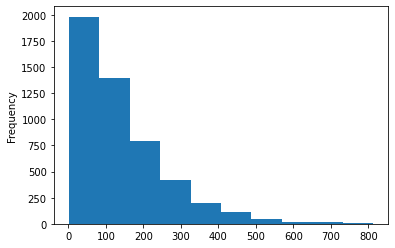

In [0]:
imdb['num_critic_for_reviews'].plot(kind='hist')

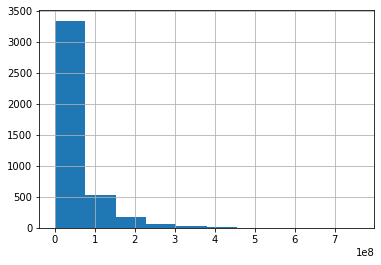

In [0]:
imdb['gross'].hist()

In [0]:
import seaborn as sns

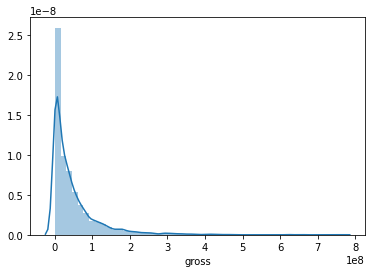

In [0]:
sns.distplot(imdb['gross'])

In [0]:
imdb.sort_values('gross', ascending=False).head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
26,Color,James Cameron,315.0,194.0,0.0,794.0,Kate Winslet,29000.0,658672302.0,Drama|Romance,Leonardo DiCaprio,Titanic,793059,45223,Gloria Stuart,0.0,artist|love|ship|titanic|wet,http://www.imdb.com/title/tt0120338/?ref_=fn_t...,2528.0,English,USA,PG-13,200000000.0,1997.0,14000.0,7.7,2.35,26000
29,Color,Colin Trevorrow,644.0,124.0,365.0,1000.0,Judy Greer,3000.0,652177271.0,Action|Adventure|Sci-Fi|Thriller,Bryce Dallas Howard,Jurassic World,418214,8458,Omar Sy,0.0,dinosaur|disaster film|experiment gone wrong|j...,http://www.imdb.com/title/tt0369610/?ref_=fn_t...,1290.0,English,USA,PG-13,150000000.0,2015.0,2000.0,7.0,2.00,150000
794,Color,Joss Whedon,703.0,173.0,0.0,19000.0,Robert Downey Jr.,26000.0,623279547.0,Action|Adventure|Sci-Fi,Chris Hemsworth,The Avengers,995415,87697,Scarlett Johansson,3.0,alien invasion|assassin|battle|iron man|soldier,http://www.imdb.com/title/tt0848228/?ref_=fn_t...,1722.0,English,USA,PG-13,220000000.0,2012.0,21000.0,8.1,1.85,123000
17,Color,Joss Whedon,703.0,173.0,0.0,19000.0,Robert Downey Jr.,26000.0,623279547.0,Action|Adventure|Sci-Fi,Chris Hemsworth,The Avengers,995415,87697,Scarlett Johansson,3.0,alien invasion|assassin|battle|iron man|soldier,http://www.imdb.com/title/tt0848228/?ref_=fn_t...,1722.0,English,USA,PG-13,220000000.0,2012.0,21000.0,8.1,1.85,123000


In [0]:
# Pegar quantidade de amostrar aletórias
imdb.sort_values('gross', ascending=False).sample(10)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
826,Color,NaN,46.0,30.0,NaN,479.0,Kristin Davis,962.0,NaN,Comedy|Romance,Chris Noth,Sex and the City,80025,2558,Cynthia Nixon,0.0,casual sex|friendship|friendship between women...,http://www.imdb.com/title/tt0159206/?ref_=fn_t...,238.0,English,USA,TV-MA,NaN,NaN,722.0,7.0,1.33,0
4445,Color,Timothy Woodward Jr.,6.0,97.0,764.0,492.0,Johnny Messner,835.0,NaN,Action|Crime|Thriller,Katrina Law,Checkmate,735,2882,Michael Paré,3.0,NaN,http://www.imdb.com/title/tt3781616/?ref_=fn_t...,18.0,English,USA,NaN,1500000.0,2015.0,522.0,3.1,2.35,402
2647,Color,Dennis Iliadis,241.0,114.0,29.0,616.0,Monica Potter,956.0,32721635.0,Crime|Horror|Thriller,Tony Goldwyn,The Last House on the Left,67822,3861,Martha MacIsaac,0.0,kidnapping|lake|microwave oven|psychopath|woods,http://www.imdb.com/title/tt0844708/?ref_=fn_t...,279.0,English,USA,R,15000000.0,2009.0,878.0,6.6,1.85,0
1183,Color,David Frankel,108.0,100.0,64.0,296.0,Kevin Pollak,734.0,7204138.0,Comedy,Joel McHale,The Big Year,34809,2085,JoBeth Williams,0.0,alaska|birding|competition|migration|storm,http://www.imdb.com/title/tt1053810/?ref_=fn_t...,125.0,English,USA,PG,41000000.0,2011.0,574.0,6.2,2.35,11000
3746,Color,Barry Levinson,42.0,110.0,272.0,551.0,Daniel Stern,801.0,14100000.0,Comedy|Drama,Steve Guttenberg,Diner,14995,2943,Ellen Barkin,6.0,baltimore colts|diner|marriage|salesman|wedding,http://www.imdb.com/title/tt0083833/?ref_=fn_t...,87.0,English,USA,R,5000000.0,1982.0,796.0,7.2,1.85,0
89,Color,Don Hall,384.0,102.0,38.0,562.0,Daniel Henney,756.0,222487711.0,Action|Adventure|Animation|Comedy|Drama|Family...,Damon Wayans Jr.,Big Hero 6,279093,2963,Abraham Benrubi,0.0,high tech|martial arts|masked man|robot|superhero,http://www.imdb.com/title/tt2245084/?ref_=fn_t...,433.0,English,USA,PG,165000000.0,2014.0,719.0,7.9,2.39,41000
1510,Color,Tony Kaye,NaN,NaN,194.0,816.0,Aisha Tyler,970.0,NaN,Crime|Drama,Bill Cobbs,Black Water Transit,219,3874,Beverly D'Angelo,0.0,based on novel,http://www.imdb.com/title/tt0490087/?ref_=fn_t...,NaN,English,USA,NaN,23000000.0,2009.0,856.0,7.2,NaN,26
4668,Color,Michael Burke,17.0,94.0,3.0,181.0,Tom Guiry,262.0,NaN,Crime|Drama|Romance,Zachary Knighton,The Mudge Boy,3480,991,Ryan Donowho,1.0,death|farm|fur coat|grief|misfit,http://www.imdb.com/title/tt0339419/?ref_=fn_t...,30.0,English,USA,R,800000.0,2003.0,262.0,7.2,NaN,396
3197,Color,Tom Brady,49.0,97.0,105.0,269.0,Kevin Nealon,982.0,2331318.0,Comedy,Don Johnson,Bucky Larson: Born to Be a Star,9541,2603,Nicholas Turturro,1.0,diner|eating a banana|masturbation|porn star|s...,http://www.imdb.com/title/tt1411664/?ref_=fn_t...,64.0,English,USA,R,10000000.0,2011.0,503.0,3.3,1.85,0
3630,Color,Sam Peckinpah,147.0,144.0,541.0,242.0,Warren Oates,682.0,NaN,Action|Adventure|Western,William Holden,The Wild Bunch,63192,2379,L.Q. Jones,1.0,friendship|honor|righteous rage|soldier|texas,http://www.imdb.com/title/tt0065214/?ref_=fn_t...,287.0,English,USA,R,6244087.0,1969.0,288.0,8.0,2.35,0


In [0]:
imdb.query("color in ['Color', ' Black and White']")['color']

0       Color
1       Color
2       Color
3       Color
5       Color
        ...  
5038    Color
5039    Color
5040    Color
5041    Color
5042    Color
Name: color, Length: 5024, dtype: object

In [0]:
imdb['color'].unique()

array(['Color', nan, ' Black and White'], dtype=object)

In [0]:
imdb['color_0_ou_1'] = imdb['color'] == 'Color'

In [0]:
imdb['color_0_ou_1'].unique()

array([ True, False])

In [0]:
color_or_bw = imdb.query("color in ['Color', ' Black and White']")

In [0]:
len(color_or_bw)

5024

In [0]:
color_or_bw['color_0_ou_1'].value_counts()

True     4815
False     209
Name: color_0_ou_1, dtype: int64

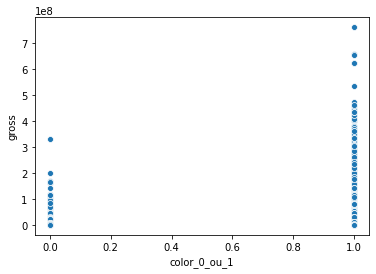

In [0]:
sns.scatterplot(data=color_or_bw, x='color_0_ou_1', y='gross')

In [0]:
color_or_bw.groupby('color').mean()['gross']

color
 Black and White    3.245702e+07
Color               4.902619e+07
Name: gross, dtype: float64

In [0]:
color_or_bw['color_0_ou_1'].unique()

array([ True, False])

In [0]:
color_or_bw.groupby('color').mean()['imdb_score']

color
 Black and White    7.227273
Color               6.409533
Name: imdb_score, dtype: float64

In [0]:
budget_gross = imdb[['budget','gross']].dropna()

Desafio 1 - Boxplot de media do colorido e do preto

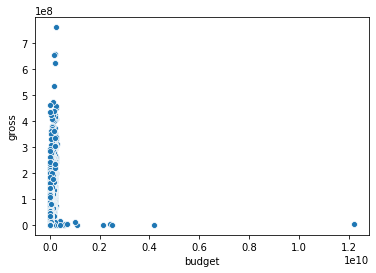

In [0]:
sns.scatterplot(data=budget_gross, x='budget', y='gross')

In [0]:
len(budget_gross)

3891

In [0]:
budget_gross = imdb[['budget','gross']].dropna().query("budget > 0 & gross > 0")

In [0]:
len(budget_gross)

3891

In [0]:
imdb.sort_values('budget', ascending=False).head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,color_0_ou_1
2988,Color,Joon-ho Bong,363.0,110.0,584.0,74.0,Kang-ho Song,629.0,2201412.0,Comedy|Drama|Horror|Sci-Fi,Doona Bae,The Host,68883,1173,Ah-sung Ko,0.0,daughter|han river|monster|river|seoul,http://www.imdb.com/title/tt0468492/?ref_=fn_t...,279.0,Korean,South Korea,R,1.221550e+10,2006.0,398.0,7.0,1.85,7000,True
3859,Color,Chan-wook Park,202.0,112.0,0.0,38.0,Yeong-ae Lee,717.0,211667.0,Crime|Drama,Min-sik Choi,Lady Vengeance,53508,907,Hye-jeong Kang,0.0,cake|christian|lesbian sex|oral sex|pregnant s...,http://www.imdb.com/title/tt0451094/?ref_=fn_t...,131.0,Korean,South Korea,R,4.200000e+09,2005.0,126.0,7.7,2.35,4000,True
3005,Color,Lajos Koltai,73.0,134.0,45.0,0.0,Péter Fancsikai,9.0,195888.0,Drama|Romance|War,Marcell Nagy,Fateless,5603,11,Bálint Péntek,0.0,bus|death|gay slur|hatred|jewish,http://www.imdb.com/title/tt0367082/?ref_=fn_t...,45.0,Hungarian,Hungary,R,2.500000e+09,2005.0,2.0,7.1,2.35,607,True
2323,Color,Hayao Miyazaki,174.0,134.0,6000.0,745.0,Jada Pinkett Smith,893.0,2298191.0,Adventure|Animation|Fantasy,Minnie Driver,Princess Mononoke,221552,2710,Billy Crudup,0.0,anime|cult film|forest|princess|studio ghibli,http://www.imdb.com/title/tt0119698/?ref_=fn_t...,570.0,Japanese,Japan,PG-13,2.400000e+09,1997.0,851.0,8.4,1.85,11000,True
2334,Color,Katsuhiro Ôtomo,105.0,103.0,78.0,101.0,Robin Atkin Downes,488.0,410388.0,Action|Adventure|Animation|Family|Sci-Fi|Thriller,William Hootkins,Steamboy,13727,991,Rosalind Ayres,1.0,19th century|ball|boy|inventor|steam,http://www.imdb.com/title/tt0348121/?ref_=fn_t...,79.0,Japanese,Japan,PG-13,2.127520e+09,2004.0,336.0,6.9,1.85,973,True


In [0]:
imdb_usa = imdb.query('country == "USA"')

In [0]:
imdb_usa.sort_values('budget', ascending=False).head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,color_0_ou_1
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,True
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,True
7,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,Brad Garrett,Tangled,294810,2036,M.C. Gainey,1.0,17th century|based on fairy tale|disney|flower...,http://www.imdb.com/title/tt0398286/?ref_=fn_t...,387.0,English,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000,True
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,J.K. Simmons,Spider-Man 3,383056,46055,Kirsten Dunst,0.0,sandman|spider man|symbiote|venom|villain,http://www.imdb.com/title/tt0413300/?ref_=fn_t...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0,True
3461,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,J.K. Simmons,Spider-Man 3,383071,46055,Kirsten Dunst,0.0,sandman|spider man|symbiote|venom|villain,http://www.imdb.com/title/tt0413300/?ref_=fn_t...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0,True


In [0]:
budget_gross = imdb_usa[['budget','gross']].dropna().query('budget > 0 & gross > 0')

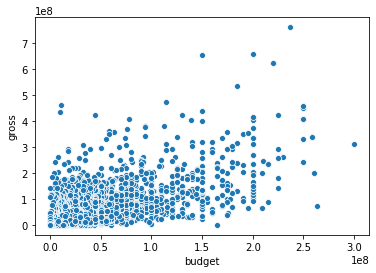

In [0]:
sns.scatterplot(data=budget_gross, x='budget', y='gross')

In [0]:
imdb_usa['gross'] - imdb_usa['budget']

0       523505847.0
1         9404152.0
3       198130642.0
5      -190641321.0
6        78530303.0
           ...     
5037        -4416.0
5039            NaN
5040            NaN
5041            NaN
5042        84122.0
Length: 3807, dtype: float64

In [0]:
imdb_usa.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,color_0_ou_1
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,True
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,True
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,True
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,True
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,J.K. Simmons,Spider-Man 3,383056,46055,Kirsten Dunst,0.0,sandman|spider man|symbiote|venom|villain,http://www.imdb.com/title/tt0413300/?ref_=fn_t...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0,True


In [6]:
imdb_usa['lucro'] = imdb_usa['gross'] - imdb_usa['budget']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
budget_gross = imdb_usa.query("budget > 0 | gross > 0")[['budget','lucro']].dropna()

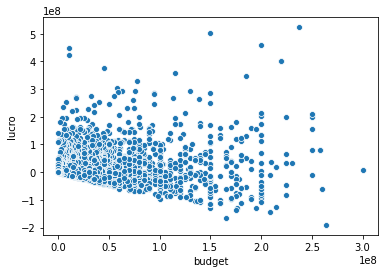

In [0]:
sns.scatterplot(data=budget_gross, x='budget', y='lucro')

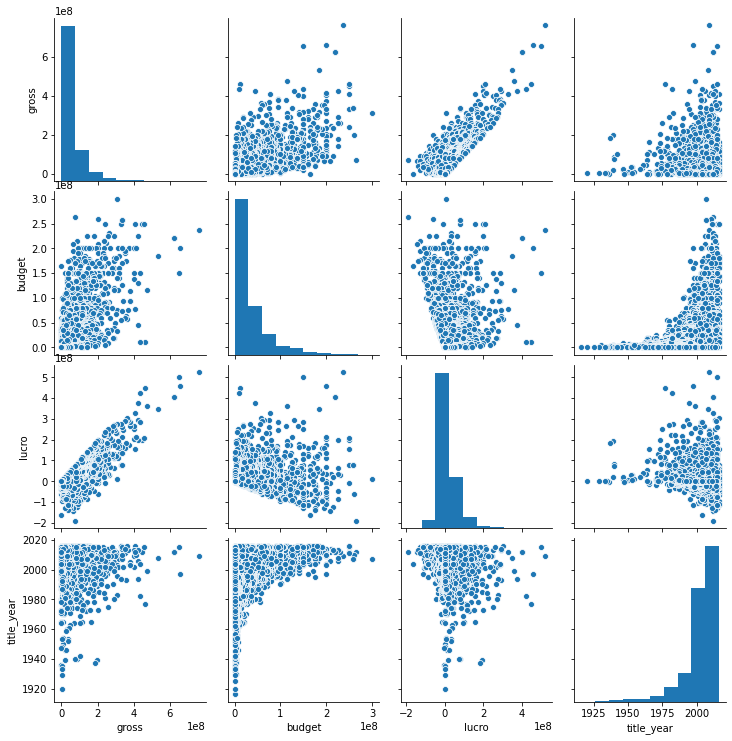

In [0]:
sns.pairplot(data = imdb_usa[['gross','budget','lucro','title_year']] )

In [0]:
#Correlações
imdb_usa[['gross','budget','lucro','title_year']].corr()

,gross,budget,lucro,title_year
gross,1.000000,0.646158,0.799260,0.036865
budget,0.646158,1.000000,0.057774,0.232640
lucro,0.799260,0.057774,1.000000,-0.122092
title_year,0.036865,0.232640,-0.122092,1.000000


In [0]:
#Defafio 1: Boxplot de média do colorido e do preto e branco.
color_or_bw.head(2)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,color_0_ou_1
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,True
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,True


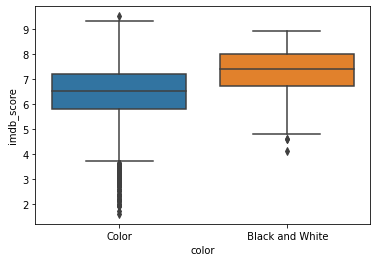

In [0]:
sns.boxplot(data=color_or_bw, x='color', y='imdb_score')

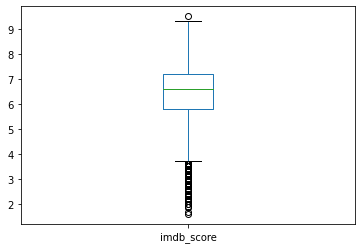

In [0]:
color_or_bw.plot(x='color', y='imdb_score', kind='box')

Desafio 2 - Filmes mais recentes tiveram maior prejuízo?


In [0]:
imdb_usa.sort_values('lucro', ascending=True).head(1)[['movie_title','lucro']]

,movie_title,lucro
5,John Carter,-190641321.0


In [0]:
imdb_usa.sort_values('lucro', ascending=False).head(1)[['movie_title','lucro']]

,movie_title,lucro
0,Avatar,523505847.0


Desafio 3 - 

In [0]:
imdb_usa.query('budget > 0 and gross > 0').sort_values('title_year', ascending=False).head(3)[['movie_title', 'lucro', 'title_year']]

,movie_title,lucro,title_year
812,Deadpool,305024263.0,2016.0
380,Now You See Me 2,-25314641.0,2016.0
2840,Miracles from Heaven,48693523.0,2016.0


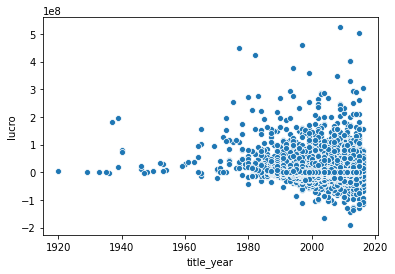

In [0]:
lucro_year = imdb_usa[["title_year", "lucro"]].dropna()

sns.scatterplot(x="title_year", y="lucro", data=lucro_year)

Desafio 4 - Confirmar a tese genial do Paulo que o cidadão estranho e o Wood Allen.

In [0]:
imdb_usa.query('title_year < 1939').sort_values('lucro', ascending=False).head(3)[['movie_title', 'lucro', 'title_year']]

,movie_title,lucro,title_year
4449,Snow White and the Seven Dwarfs,182925485.0,1937.0
4958,Over the Hill to the Poorhouse,2900000.0,1920.0
4812,The Broadway Melody,2429000.0,1929.0


Desafio 5 - Confirmar a tese genial do Paulo que o cidadão estranho e o Wood Allen.

In [0]:
filmes_por_diretor = imdb_usa["director_name"].value_counts()
gross_director = imdb_usa[["director_name", "gross"]].set_index("director_name").join(filmes_por_diretor, on="director_name")
gross_director.columns=["dindin", "filmes_irmaos"]
gross_director = gross_director.reset_index()
gross_director.head()

,director_name,dindin,filmes_irmaos
0,James Cameron,760505847.0,6.0
1,Gore Verbinski,309404152.0,7.0
2,Christopher Nolan,448130642.0,8.0
3,Andrew Stanton,73058679.0,3.0
4,Sam Raimi,336530303.0,11.0


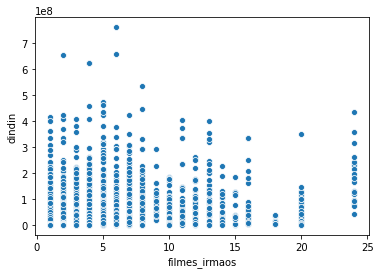

In [0]:
sns.scatterplot(x="filmes_irmaos", y="dindin", data = gross_director)

In [0]:
gross_director.query('filmes_irmaos == 18').drop_duplicates()

,director_name,dindin,filmes_irmaos
1549,Woody Allen,7496522.0,18.0
1748,Woody Allen,16684352.0,18.0
1873,Woody Allen,13383737.0,18.0
1881,Woody Allen,10569071.0,18.0
1884,Woody Allen,9714482.0,18.0
1973,Woody Allen,33404871.0,18.0
1988,Woody Allen,17071230.0,18.0
2006,Woody Allen,3203044.0,18.0
2085,Woody Allen,14792779.0,18.0
2094,Woody Allen,4839383.0,18.0


In [0]:
Desafio 7 - Interpretar melhor o gráfico e outros gráficos, mudar marcador.

Desafio 8 - Calcular a correlação somente para filmes depois de 2000 (jogar fora os de antes de 2000)

In [0]:
imdb_usa_pos2000 = imdb_usa.query('title_year >= 2000')

In [11]:
imdb_usa_pos2000.corr()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,lucro
num_critic_for_reviews,1.000000,0.461569,0.262444,0.294462,0.163409,0.548048,0.719575,0.249658,-0.053665,0.630424,0.538089,0.260533,0.305050,0.444013,0.008294,0.699418,0.311930
duration,0.461569,1.000000,0.245499,0.197861,0.102825,0.347686,0.468179,0.160775,0.009097,0.477591,0.420478,0.008876,0.190076,0.349009,0.031663,0.351111,0.133163
director_facebook_likes,0.262444,0.245499,1.000000,0.154677,0.079877,0.153306,0.362091,0.123177,-0.068598,0.295040,0.149821,-0.011764,0.152627,0.187845,0.014369,0.217575,0.086505
actor_3_facebook_likes,0.294462,0.197861,0.154677,1.000000,0.233867,0.343526,0.343972,0.460978,0.105537,0.252502,0.291786,0.085686,0.565537,0.101589,0.006635,0.309815,0.227332
actor_1_facebook_likes,0.163409,0.102825,0.079877,0.233867,1.000000,0.130590,0.174859,0.952317,0.068333,0.120640,0.142744,0.033397,0.360899,0.120601,-0.000846,0.111481,0.046226
gross,0.548048,0.347686,0.153306,0.343526,0.130590,1.000000,0.696368,0.236676,-0.022959,0.595316,0.708050,0.108058,0.276882,0.249787,0.060272,0.417628,0.774906
num_voted_users,0.719575,0.468179,0.362091,0.343972,0.174859,0.696368,1.000000,0.268147,-0.043623,0.799496,0.529249,0.009860,0.306230,0.461670,0.011619,0.569448,0.522591
cast_total_facebook_likes,0.249658,0.160775,0.123177,0.460978,0.952317,0.236676,0.268147,1.000000,0.087820,0.193351,0.229120,0.057310,0.602435,0.142818,0.002375,0.197023,0.118682
facenumber_in_poster,-0.053665,0.009097,-0.068598,0.105537,0.068333,-0.022959,-0.043623,0.087820,1.000000,-0.099809,-0.031541,0.099223,0.066657,-0.091118,0.002301,0.002149,-0.010688
num_user_for_reviews,0.630424,0.477591,0.295040,0.252502,0.120640,0.595316,0.799496,0.193351,-0.099809,1.000000,0.489359,-0.150490,0.233918,0.331150,0.000999,0.406903,0.415539


Desafio 9 - Tentar encontrar uma reta no gráfico que parece se aproximar com uma reta, por exemplo (budget/lucro),(gross/lucro)

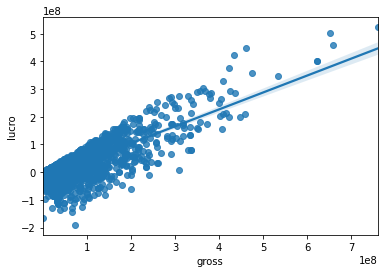

In [7]:
sns.regplot(data=imdb_usa[['gross','lucro']], x='gross', y='lucro')

**Outras soluções interessantes compartilhadas na rede**

https://github.com/BiaChacon/data-science-starting

https://github.com/avellar1975/DataScience
